In [1]:
from copy import deepcopy

from math import sqrt

import pandas as pd

import cirq
import openfermion as of

from kcommute import get_si_sets, r_hat_measurement_count, commutes
from kcommute.hamlib_interface import read_openfermion_hdf5

In [2]:
# Import Bose-Hubbard from HamLib
fname = "BH_D-1_d-4.hdf5"
key = "bh_graph-1D-grid-pbc-qubitnodes_Lx-4_U-2_enc-stdbinary_d-4"
#print_hdf5_structure(fname)
ham = read_openfermion_hdf5(fname, key)

In [3]:
nq = of.utils.count_qubits(ham)
print(nq)

8


In [ ]:
qubits = cirq.LineQubit.range(nq)
kvals = list(range(1, nq + 1, 1))
rhats = []
ngroups = []

for k in kvals:
    print("On k =", k)
    blocks = commutes.compute_blocks(qubits, k)
    print("Blocks are:")
    print(blocks)
    groups = get_si_sets(ham, blocks=blocks)
    print(f"Finished grouping, there are {len(groups)} groups.")
    print("Groups are:")
    print(groups)
    ngroups.append(len(groups))

    rhats.append(r_hat_measurement_count(groups))
    print("rhat =", rhats[-1])

On k = 1
Blocks are:
[[cirq.LineQubit(0)], [cirq.LineQubit(1)], [cirq.LineQubit(2)], [cirq.LineQubit(3)], [cirq.LineQubit(4)], [cirq.LineQubit(5)], [cirq.LineQubit(6)], [cirq.LineQubit(7)]]
Finished grouping, there are 21 groups.
Groups are:
[[-2.0 [Z1], -2.0 [Z3], -2.0 [Z5], -2.0 [Z7], -1.0 [Z0], 1.0 [Z0 Z1], -1.0 [Z2], 1.0 [Z2 Z3], -1.0 [Z4], 1.0 [Z4 Z5], -1.0 [Z6], 1.0 [Z6 Z7]], [0.9330127018922193 [X0 X2], 0.9330127018922193 [X0 X6], 0.9330127018922193 [X2 X4], 0.9330127018922193 [X4 X6], 0.48296291314453416 [X0 X1 X2], 0.48296291314453416 [X0 X1 X6], 0.48296291314453416 [X0 X2 X3], 0.48296291314453416 [X0 X6 X7], 0.48296291314453416 [X2 X3 X4], 0.48296291314453416 [X2 X4 X5], 0.48296291314453416 [X4 X5 X6], 0.48296291314453416 [X4 X6 X7], 0.25000000000000006 [X0 X1 X2 X3], 0.25000000000000006 [X0 X1 X6 X7], 0.25000000000000006 [X2 X3 X4 X5], 0.25000000000000006 [X4 X5 X6 X7]], [(0.9330127018922193+0j) [Y0 Y2], (0.9330127018922193+0j) [Y0 Y6], (0.9330127018922193+0j) [Y2 Y4], (0.93

<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/var/folders/rv/3v7hvpgn6ks14zr4w90jz4zc0000gn/T/ipykernel_4598/3849024252.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(kvals, rhats, label="$\hat{R}$")


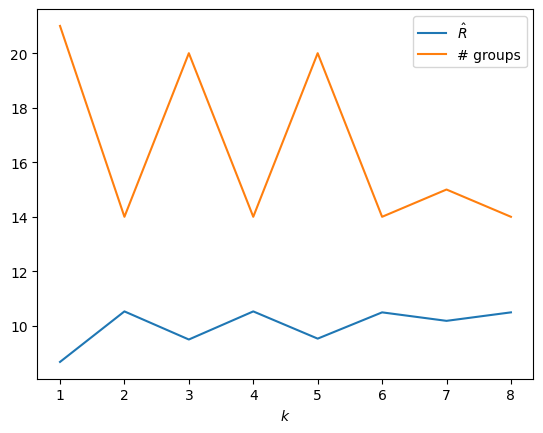

In [5]:
import matplotlib.pyplot as plt


plt.plot(kvals, rhats, label="$\hat{R}$")
plt.plot(kvals, ngroups, label="# groups")

plt.xlabel("$k$")
plt.legend();
plt.savefig("bose_hubbard.png")

In [6]:
df = pd.DataFrame({"ngroups": ngroups, "rhat": rhats})
df.index.name = "i"
print(df.head())

   ngroups       rhat
i                    
0       21   8.677679
1       14  10.530286
2       20   9.499691
3       14  10.530286
4       20   9.531879


In [7]:
df.to_csv(key + ".csv")